In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets

In [8]:
print(datasets.load_iris().target)
print(datasets.load_iris().data)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

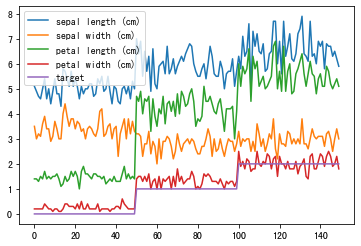

In [12]:
data=pd.DataFrame(datasets.load_iris().data,columns=datasets.load_iris().feature_names)
data['target']=datasets.load_iris().target
data
data.plot()

## 数据预处理

In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler=MinMaxScaler()
sample=scaler.fit_transform(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']])
target=data['target']

## 数据的切分

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test=train_test_split(sample,target,test_size=1/3)

clf=SVC(kernel='linear',probability=True)
clf.fit(X_train,Y_train)
proba=clf.predict_proba(X_test)
result=clf.predict(X_test)
result


array([1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2,
       0, 1, 1, 2, 0, 2])

## 结果评价

In [46]:
clf.score(X_test,Y_test)

0.98

In [49]:
from sklearn.metrics import classification_report

print(classification_report(target,clf.predict(sample),target_names=datasets.load_iris().target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.98      0.95        50
   virginica       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [53]:
#交叉验证
from sklearn.model_selection import cross_val_score

scores=cross_val_score(clf,sample,target,cv=5)
print(scores)

#平均得分和95%置信区间
print(r'Accuracy: %0.2f (+/-%0.2f)'%(scores.mean(),scores.std()*2))

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Accuracy: 0.97 (+/-0.04)


## 模型的久化

In [55]:
import pickle

s=pickle.dumps(clf) #保存模型成字符串
pickle.loads(s)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [57]:
from sklearn.externals import joblib

joblib.dump(clf,'project2.pkl')
clf_a=joblib.load('project2.pkl')

['project2.pkl']